In [1]:
import pandas as pd
import geopandas as gpd
import shapely as shp
import geopy as gp

boston_assement = pd.read_csv('/Users/kellyduncan/Downloads/fy19fullpropassess.csv', dtype={'ZIPCODE': 'str'})

/Users/kellyduncan/python/ENV/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15,60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
boston_assement.head(10)

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
0,502550008,502550000.0,502550000,87,BEACON,ST,2-F,2108,102,CD,...,M,NaN,O,M,W,N,1.0,N,G,A
1,502550010,502550000.0,502550000,87,BEACON,ST,2-R,2108,102,CD,...,NaN,NaN,O,S,W,N,1.0,N,A,A
2,502550012,502550000.0,502550000,87,BEACON,ST,3-F,2108,102,CD,...,S,NaN,O,M,W,N,1.0,N,A,G
3,502550014,502550000.0,502550000,87,BEACON,ST,3-R,2108,102,CD,...,NaN,NaN,O,N,W,N,1.0,S,A,G
4,502550016,502550000.0,502550000,87,BEACON,ST,4,2108,102,CD,...,M,M,O,L,W,C,2.0,N,E,G
5,502551000,502551000.0,502551000,88,BEACON,ST,NaN,2108,995,CM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,502551002,502551000.0,502551000,88,BEACON,ST,1,2108,102,CD,...,NaN,NaN,P,S,W,N,0.0,N,A,F
7,502551004,502551000.0,502551000,88,BEACON,ST,2,2108,102,CD,...,NaN,NaN,O,M,W,C,1.0,N,A,F
8,502551006,502551000.0,502551000,88,BEACON,ST,3,2108,102,CD,...,L,L,F,L,W,N,2.0,E,E,E
9,502551008,502551000.0,502551000,88,BEACON,ST,4,2108,102,CD,...,NaN,NaN,F,M,W,N,0.0,N,A,E


In [3]:
boston_assement['CITY'] = 'BOSTON'
boston_assement['address'] = boston_assement.ST_NUM.str.cat(boston_assement.ST_NAME.str.cat(boston_assement.ST_NAME_SUF, sep=' '), sep= ' ')
boston_assement['full_address'] = boston_assement.address.str.cat(boston_assement.UNIT_NUM, sep =' ', na_rep ='')
#boston_assement['address'] = boston_assement.address.str.cat(boston_assement.CITY, sep=' ')
print(boston_assement['full_address'].head(10))

0    87 BEACON ST 2-F
1    87 BEACON ST 2-R
2    87 BEACON ST 3-F
3    87 BEACON ST 3-R
4      87 BEACON ST 4
5       88 BEACON ST 
6      88 BEACON ST 1
7      88 BEACON ST 2
8      88 BEACON ST 3
9      88 BEACON ST 4
Name: full_address, dtype: object


In [4]:
#Creating file of addresses to run through TIGER DATA batch processor
boston_batch = pd.DataFrame({'ADDRESS' : []})
print(boston_batch)
boston_batch['ADDRESS'] = boston_assement['address']
boston_batch['CITY'] = 'BOSTON'
boston_batch['STATE'] = 'MA'
boston_batch['ZIPCODE'] = boston_assement['ZIPCODE'].apply(lambda x: '{0:0>5}'.format(x))
print(boston_batch.ZIPCODE.dtype)

boston_batch.head(10)
#boston_batch.to_csv('Boston_Batch_FULL.csv', sep=',')

Empty DataFrame
Columns: [ADDRESS]
Index: []
object


,ADDRESS,CITY,STATE,ZIPCODE
0,87 BEACON ST,BOSTON,MA,02108
1,87 BEACON ST,BOSTON,MA,02108
2,87 BEACON ST,BOSTON,MA,02108
3,87 BEACON ST,BOSTON,MA,02108
4,87 BEACON ST,BOSTON,MA,02108
5,88 BEACON ST,BOSTON,MA,02108
6,88 BEACON ST,BOSTON,MA,02108
7,88 BEACON ST,BOSTON,MA,02108
8,88 BEACON ST,BOSTON,MA,02108
9,88 BEACON ST,BOSTON,MA,02108


In [5]:
boston_longlat = pd.read_csv('/Users/kellyduncan/Downloads/Boston_Result_FULL.csv')
boston_longlat = boston_longlat.columns.to_frame().T.append(boston_longlat, ignore_index=True)
boston_longlat.columns = range(len(boston_longlat.columns))
boston_longlat.head(100)

,0,1,2,3,4,5,6,7
0,0,"87 BEACON ST, BOSTON, MA, 02108",Match,Exact,"87 BEACON ST, BOSTON, MA, 02108.1","-71.07136,42.35576",85697777,R
1,1,"87 BEACON ST, BOSTON, MA, 02108",Match,Exact,"87 BEACON ST, BOSTON, MA, 02108","-71.07136,42.35576",8.56978e+07,R
2,2,"87 BEACON ST, BOSTON, MA, 02108",Match,Exact,"87 BEACON ST, BOSTON, MA, 02108","-71.07136,42.35576",8.56978e+07,R
3,3,"87 BEACON ST, BOSTON, MA, 02108",Match,Exact,"87 BEACON ST, BOSTON, MA, 02108","-71.07136,42.35576",8.56978e+07,R
4,4,"87 BEACON ST, BOSTON, MA, 02108",Match,Exact,"87 BEACON ST, BOSTON, MA, 02108","-71.07136,42.35576",8.56978e+07,R
...,...,...,...,...,...,...,...,...
95,95,"240 PRINCETON ST, BOSTON, MA, 02128",Match,Exact,"240 PRINCETON ST, BOSTON, MA, 02128","-71.03104,42.379364",8.57116e+07,L
96,96,"238 R238 PRINCETON ST, BOSTON, MA, 02128",Match,Exact,"238 PRINCETON ST, BOSTON, MA, 02128","-71.0311,42.37934",8.57116e+07,L
97,97,"238 R238 PRINCETON ST, BOSTON, MA, 02128",Match,Exact,"238 PRINCETON ST, BOSTON, MA, 02128","-71.0311,42.37934",8.57116e+07,L
98,98,"236 PRINCETON ST, BOSTON, MA, 02128",Match,Exact,"236 PRINCETON ST, BOSTON, MA, 02128","-71.03116,42.37932",8.57116e+07,L


In [132]:
final_assement= boston_assement.merge(boston_longlat[5],  how='outer', left_index=True, right_index=True)
new = final_assement[5].str.split(",", n = 1, expand = True)
final_assement['Long']=new[0]
final_assement['Lat'] = new[1]
final_assement.head(10)
final_boston_ass = final_assement[['CITY', 'address','full_address','Long','Lat','AV_LAND',         'AV_BLDG',
              'AV_TOTAL', 'YR_BUILT','YR_REMOD','GROSS_AREA',
                                  'LIVING_AREA']]
final_boston_ass['AV_Per_Sq']= final_boston_ass['AV_TOTAL']/final_boston_ass['GROSS_AREA']
#final_boston_ass.head(20)

KeyError: 0

               Name Description  \
0        Roslindale               
1     Jamaica Plain               
2      Mission Hill               
3          Longwood               
4       Bay Village               
5  Leather District               
6         Chinatown               
7         North End               
8           Roxbury               
9         South End               

                                            geometry  
0  MULTIPOLYGON (((-71.12593 42.27201, -71.12611 ...  
1  POLYGON ((-71.10499 42.32610, -71.10503 42.326...  
2  POLYGON ((-71.09043 42.33577, -71.09050 42.335...  
3  POLYGON ((-71.09811 42.33673, -71.09832 42.337...  
4  POLYGON ((-71.06663 42.34878, -71.06663 42.348...  
5  POLYGON ((-71.05838 42.34983, -71.05834 42.349...  
6  POLYGON ((-71.05791 42.35238, -71.05811 42.352...  
7  POLYGON ((-71.05200 42.36884, -71.05219 42.368...  
8  POLYGON ((-71.09646 42.29323, -71.09633 42.293...  
9  POLYGON ((-71.06834 42.34775, -71.06913 42.347...  
         

<Figure size 432x288 with 0 Axes>

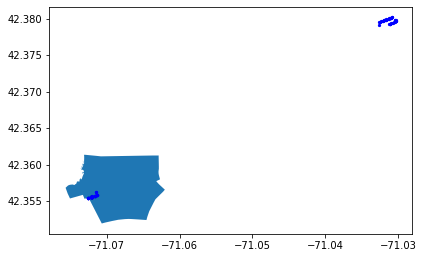

In [165]:
import shapely
import geopandas
from matplotlib import pyplot as plt
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'



def within_shape(df, shapes):
    in_shape = []
    for sh in shapes.geometry:
        within = df.within(sh)
        in_shape.append(within)
    return in_shape

plt.clf()



#gdf = geopandas.read_file('/Users/kellyduncan/Downloads/Boston_Neighborhoods-shp/Boston_Neighborhoods.shp') 
gdf = geopandas.read_file('/Users/kellyduncan/Downloads/Boston_Neighborhoods.kml', driver='KML')

print(gdf.head(10))#print(gdf[gdf.Name.eq("Beacon Hill")])
#gdf.plot()
#plt.show()

gdf2 = geopandas.GeoDataFrame(final_boston_ass, geometry=geopandas.points_from_xy(final_boston_ass.Long, final_boston_ass.Lat))
#print(gdf2.head(10))
#gdf2.plot()
#plt.show()
    

point = (-71.07136,42.35576)
point2 = (42.35576,-71.07136)

fig, ax = plt.subplots()

beacon_hill = gdf[gdf.Name.eq("Beacon Hill")]
print(beacon_hill)
beacon_hill.plot(ax=ax)

gdf2.head(100).plot(ax=ax, color='blue', markersize=5)
plt.tight_layout()

print(beacon_hill['geometry'])
new_point = shapely.geometry.Point(point)
beacon_hill.geometry.contains(new_point)
#new_point.within(beacon_hill['geometry'])
#shapely.geometry.shape(beacon_hill)
#print(gdf['geometry'])

gdf2['neighborhood'] = None
for index, row in gdf2.iterrows():
    for name in gdf['Name']:
        if gdf[gdf.Name.eq(name)].geometry.contains(row.geometry).bool():
            gdf2.at[index,'neighborhood'] = name
            break
    #if index > 100:
    #    break
print(gdf2.head(100))
        


#This takes about an hour to run

#point.within()


In [ ]:
import geopandas as gp
import shapely
import fiona
import pandas as pd

nyc_property_a = gp.read_file('/Users/kellyduncan/Downloads/nyc_prop_part.csv')
print("First 10 NYC Property Assesments: ", nyc_property_a.head(10))

In [231]:
nyc_residential_property = nyc_property_a[nyc_property_a.TAXCLASS.eq("1")]
print(nyc_residential_property.columns)

nyc_residential_property=nyc_residential_property[['AVLAND','AVTOT','FULLVAL','STADDR','BORO','AVLAND2','AVTOT2','TAXCLASS',''\
                                                  'New Georeferenced Column', 'Zip Codes','PERIOD','YEAR']]
new_column = nyc_residential_property['New Georeferenced Column'].str.split(expand=True)
print(nyc_residential_property.head(10))
nyc_residential_property['Long']=new_column[1].str.strip('(').astype('float')
nyc_residential_property['Lat']=new_column[2].str.strip(')').astype('float')

#nyc_residential_property['longlat']= 
#nyc_residential_property.head(10)

gdf_nyc = geopandas.read_file('/Users/kellyduncan/Downloads/nynta.csv')
gdf_nyc_2 = geopandas.read_file('Neighborhood Tabulation Areas (NTA).kml', driver='KML')

#print(gdf_nyc.head(10))#print(gdf[gdf.Name.eq("Beacon Hill")])
#print(gdf_nyc.columns)

for boro in nyc_residential_property['BORO']:
    print("Boro, ", boro)
    for index, row in nyc_residential_property[nyc_residential_property.BORO.eq(boro)].iterrows():
        print(index, ', ', row)
        gdf_boro = gdf_nyc[gdf_nyc['BoroCode'].eq(boro)]
        for name, bn in gdf_boro[['NTAName','BoroName']].items():
            #print(row['New Georeferenced Column'].dtype)
            print(Point(row['Long'],row['Lat']).dtype)
            print(gdf_nyc[gdf_nyc.NTAName.eq(name)].geometry.contains(Point(row['Long'],row['Lat'])))
            if gdf_nyc[gdf_nyc.NTAName.eq(name)].geometry.contains(Point(row['Long'],row['Lat'])).bool():
                nyc_resident_propertype.at[index,'neighborhood'] = name
                nyc_resident_propertype.at[index,'neighborhood'] = bn
                break
            break
        break
    break
    

#PERIOD
#YEAR

KeyboardInterrupt: 

In [334]:
#print(gdf_nyc[].head(10))

gdf_nyc_2 = geopandas.read_file('/Users/kellyduncan/Downloads/Neighborhood Tabulation Areas (NTA).kml', driver='KML')
print(gdf_nyc_2.head(10))
#print(gdf_nyc[['Name','NTAName','BoroName']].head(10))#.gdf_nyc['BoroCode'].eq(1).head(10))
print(gdf_nyc.columns)
print(gdf_nyc.head(10))
gdf_nyc_final = pd.concat([gdf_nyc[['NTAName','BoroName','BoroCode','the_geom']], gdf_nyc_2['geometry']], axis=1, join='inner')

#I've done 1- Manhattan, 2- Bronx, 4- Queens, Need to do 3,5
print( nyc_residential_property['BORO'].unique())
for boro in ('3','5'):#nyc_residential_property['BORO'].unique():
    if boro in ('1','2','4'):
        break
    print("Boro, ", boro)
    gdf_boro = gdf_nyc_final[gdf_nyc_final['BoroCode'].eq(boro)]
    #print(gdf_boro)
    for index, row in nyc_residential_property[nyc_residential_property.BORO.eq(boro)].iterrows():
        for index1, row1 in gdf_boro.iterrows(): #The next two loops should be switched with a break function for optimal efficiency
            #print(row1)
            #print(row1['geometry'])
            if row1.geometry.contains(Point(row['Long'],row['Lat'])):
                #print("here")
                #print(index)
                #print(row1.NTAName)

                nyc_residential_property.at[index,'neighborhood'] = row1.NTAName
                nyc_residential_property.at[index,'BoroName'] = row1.BoroName
                break
                #print(row['neighborhood'])
    


#gdf_nyc_final.

  Name Description                                           geometry
0                   MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...
1                   MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...
2                   MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...
3                   MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...
4                   MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...
5                   MULTIPOLYGON (((-73.95859 40.61040, -73.95828 ...
6                   MULTIPOLYGON (((-73.77758 40.73019, -73.77849 ...
7                   MULTIPOLYGON (((-73.89484 40.82625, -73.89487 ...
8                   MULTIPOLYGON (((-73.96015 40.62892, -73.95996 ...
9                   MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...
Index(['CountyFIPS', 'BoroCode', 'the_geom', 'BoroName', 'NTACode', 'NTAName',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')
  CountyFIPS BoroCode                                           the_geom  \
0    

In [337]:
nyc_residential_property.to_csv('/Users/kellyduncan/Downloads/nyc_residential_property.csv')

In [287]:
gdf2.to_csv('/Users/kellyduncan/Downloads/boston_residential_property.csv')

In [336]:
nyc_residential_property[(nyc_residential_property['BORO']=='5') & (nyc_residential_property.neighborhood.isin(['Gramercy','Clinton','Murray Hill-Kips Bay']) == False)].head(30)

,AVLAND,AVTOT,FULLVAL,STADDR,BORO,AVLAND2,AVTOT2,TAXCLASS,New Georeferenced Column,Zip Codes,PERIOD,YEAR,Long,Lat,neighborhood,BoroName
841538,7342,7447,356000,SUNSET HILL DRIVE,5,,,1,,,FINAL,2010/11,NaN,NaN,NaN,NaN
880966,8359,13483,350000,31 STEUBEN STREET,5,,,1,POINT (-74.087416 40.611376),10691,FINAL,2010/11,-74.087416,40.611376,Grymes Hill-Clifton-Fox Hills,Staten Island
880969,17686,30528,775000,189 MEISNER AVENUE,5,,,1,POINT (-74.132906 40.57913),10693,FINAL,2010/11,-74.132906,40.579130,Todt Hill-Emerson Hill-Heartland Village-Light...,Staten Island
880972,14899,23102,445000,526 TRAVIS AVENUE,5,,,1,POINT (-74.158201 40.590714),10700,FINAL,2010/11,-74.158201,40.590714,Todt Hill-Emerson Hill-Heartland Village-Light...,Staten Island
880974,14340,23100,385000,15 WATERVIEW COURT,5,,,1,POINT (-74.06269 40.614071),10692,FINAL,2010/11,-74.062690,40.614071,Stapleton-Rosebank,Staten Island
880975,9199,15429,421000,68 ST MARY'S AVENUE,5,,,1,POINT (-74.069884 40.615261),10692,FINAL,2010/11,-74.069884,40.615261,Stapleton-Rosebank,Staten Island
880976,12840,22440,374000,125 CANNON AVENUE,5,,,1,POINT (-74.189044 40.594661),10700,FINAL,2010/11,-74.189044,40.594661,New Springville-Bloomfield-Travis,Staten Island
880979,22980,38880,648000,38 BEARD STREET,5,,,1,POINT (-74.149001 40.587364),10700,FINAL,2010/11,-74.149001,40.587364,Todt Hill-Emerson Hill-Heartland Village-Light...,Staten Island
880980,18026,29146,498000,69 SOMMER AVENUE,5,,,1,POINT (-74.16512 40.607588),10700,FINAL,2010/11,-74.165120,40.607588,New Springville-Bloomfield-Travis,Staten Island
880981,10655,18436,417000,74 FERNDALE AVENUE,5,,,1,POINT (-74.159595 40.592395),10700,FINAL,2010/11,-74.159595,40.592395,Todt Hill-Emerson Hill-Heartland Village-Light...,Staten Island
